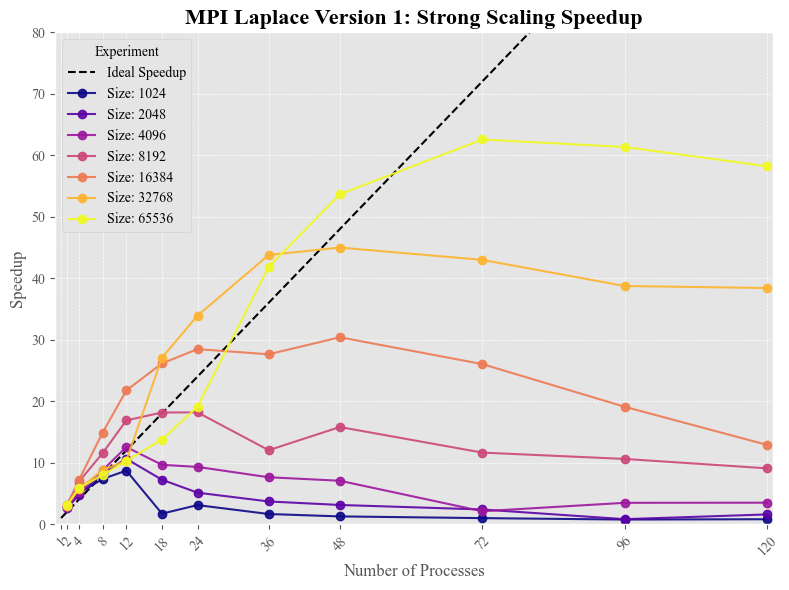

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

df = pd.read_csv('../results/laplace_timings_clus_72055.csv')

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
matrix_sizes = sorted(df['matrix_size'].unique())
max_processes = df['processes'].max()

ax.plot([1, max_processes], [1, max_processes], 'k--', label='Ideal Speedup')
colors_matrix = plt.cm.plasma(np.linspace(0, 1, len(matrix_sizes)))
for i, size in enumerate(matrix_sizes):
    df_size = df[df['matrix_size'] == size]
    mpi_data = df_size[df_size['type'] == 'mpi'].sort_values(by='processes')
    seq_data = df_size[df_size['type'] == 'sequential']

    if not mpi_data.empty:
        ax.plot(mpi_data['processes'], 
                mpi_data['speedup'], 
                label=f'Size: {size}', 
                marker='o',
                color=colors_matrix[i],
                linestyle='-',
                alpha = 0.9)

ax.set_title(f'MPI Laplace Version 1: Strong Scaling Speedup', fontsize=16, fontweight='bold')

ax.set_xlabel('Number of Processes', fontsize=12)
ax.set_ylabel('Speedup', fontsize=12)

all_procs = sorted(df[df['type']=='mpi']['processes'].unique())
ax.set_xticks([1] + all_procs)
ax.set_xticklabels([1] + all_procs, rotation=45) 

ax.legend(title='Experiment')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim(left=0, right=max_processes + 1)
ax.set_ylim(0, 80)

fig.tight_layout()
plt.show()


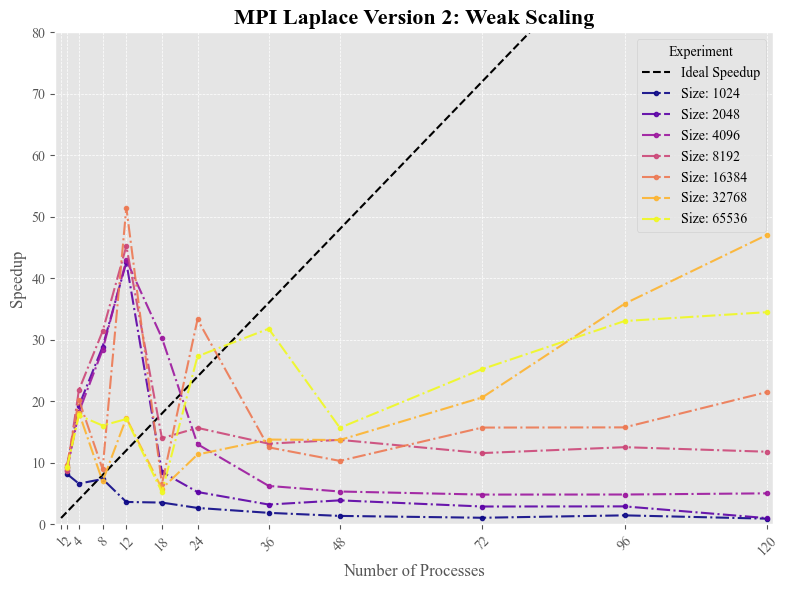

In [33]:
df_v2 = pd.read_csv('../results/laplace_timings_clus_v2_73235.csv')

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
matrix_sizes = sorted(df_v2['matrix_size'].unique())
max_processes = df_v2['processes'].max()

ax.plot([1, max_processes], [1, max_processes], 'k--', label='Ideal Speedup')
colors_matrix = plt.cm.plasma(np.linspace(0, 1, len(matrix_sizes)))
for i, size in enumerate(matrix_sizes):
    df_v2_size = df_v2[df_v2['matrix_size'] == size]
    mpi_v2_data = df_v2_size[df_v2_size['type'] == 'mpi'].sort_values(by='processes')
    seq_v2_data = df_v2_size[df_v2_size['type'] == 'sequential']

    if not mpi_v2_data.empty:
        ax.plot(mpi_v2_data['processes'], 
                mpi_v2_data['speedup'], 
                label=f'Size: {size}', 
                marker='.',
                color=colors_matrix[i],
                linestyle='-.',
                alpha = 0.9)

ax.set_title(f'MPI Laplace Version 2: Weak Scaling', fontsize=16, fontweight='bold')

ax.set_xlabel('Number of Processes', fontsize=12)
ax.set_ylabel('Speedup', fontsize=12)

all_procs = sorted(df[df['type']=='mpi']['processes'].unique())
ax.set_xticks([1] + all_procs)
ax.set_xticklabels([1] + all_procs, rotation=45) 

ax.legend(title='Experiment')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim(left=0, right=max_processes + 1)
ax.set_ylim(0, 80)

fig.tight_layout()
plt.show()

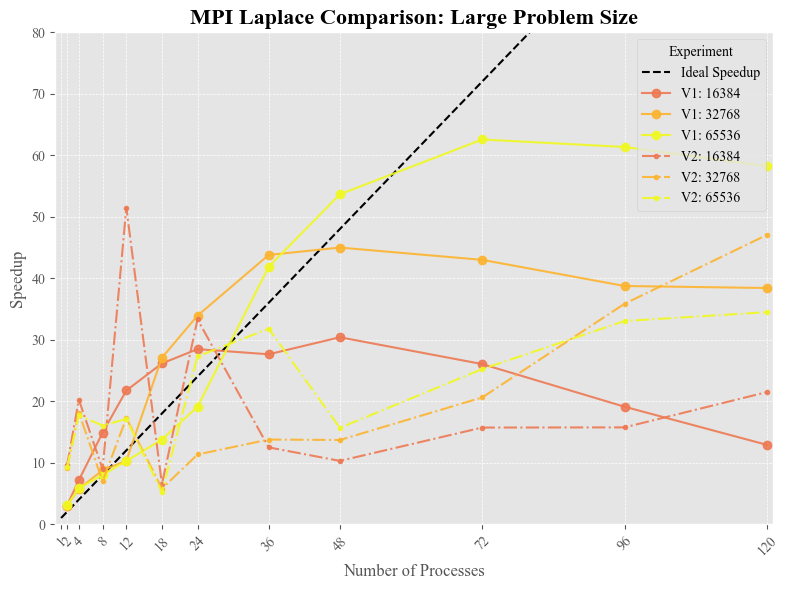

In [31]:
matrix_sizes = (16384,32768,65536)
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
max_processes = df['processes'].max()

ax.plot([1, max_processes], [1, max_processes], 'k--', label='Ideal Speedup')
colors_matrix = plt.cm.plasma(np.linspace(0, 1, 7))

for i, size in enumerate(matrix_sizes):
        df_size = df[df['matrix_size'] == size]
        mpi_data = df_size[df_size['type'] == 'mpi'].sort_values(by='processes')
        seq_data = df_size[df_size['type'] == 'sequential']

        ax.plot(mpi_data['processes'], 
                mpi_data['speedup'], 
                label=f'V1: {size}', 
                marker='o',
                color=colors_matrix[i+4],
                linestyle='-',
                alpha = 0.9)

for i, size in enumerate(matrix_sizes):
        df_v2_size = df_v2[df_v2['matrix_size'] == size]
        mpi_v2_data = df_v2_size[df_v2_size['type'] == 'mpi'].sort_values(by='processes')
        seq_v2_data = df_v2_size[df_v2_size['type'] == 'sequential']

        ax.plot(mpi_v2_data['processes'], 
                mpi_v2_data['speedup'], 
                label=f'V2: {size}', 
                marker='.',
                color=colors_matrix[i+4],
                linestyle='-.',
                alpha = 0.9)

ax.set_title(f'MPI Laplace Comparison: Large Problem Size', fontsize=16, fontweight='bold')

ax.set_xlabel('Number of Processes', fontsize=12)
ax.set_ylabel('Speedup', fontsize=12)

all_procs = sorted(df[df['type']=='mpi']['processes'].unique())
ax.set_xticks([1] + all_procs)
ax.set_xticklabels([1] + all_procs, rotation=45) 

ax.legend(title='Experiment')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlim(left=0, right=max_processes + 1)
ax.set_ylim(0, 80)

fig.tight_layout()
plt.show()

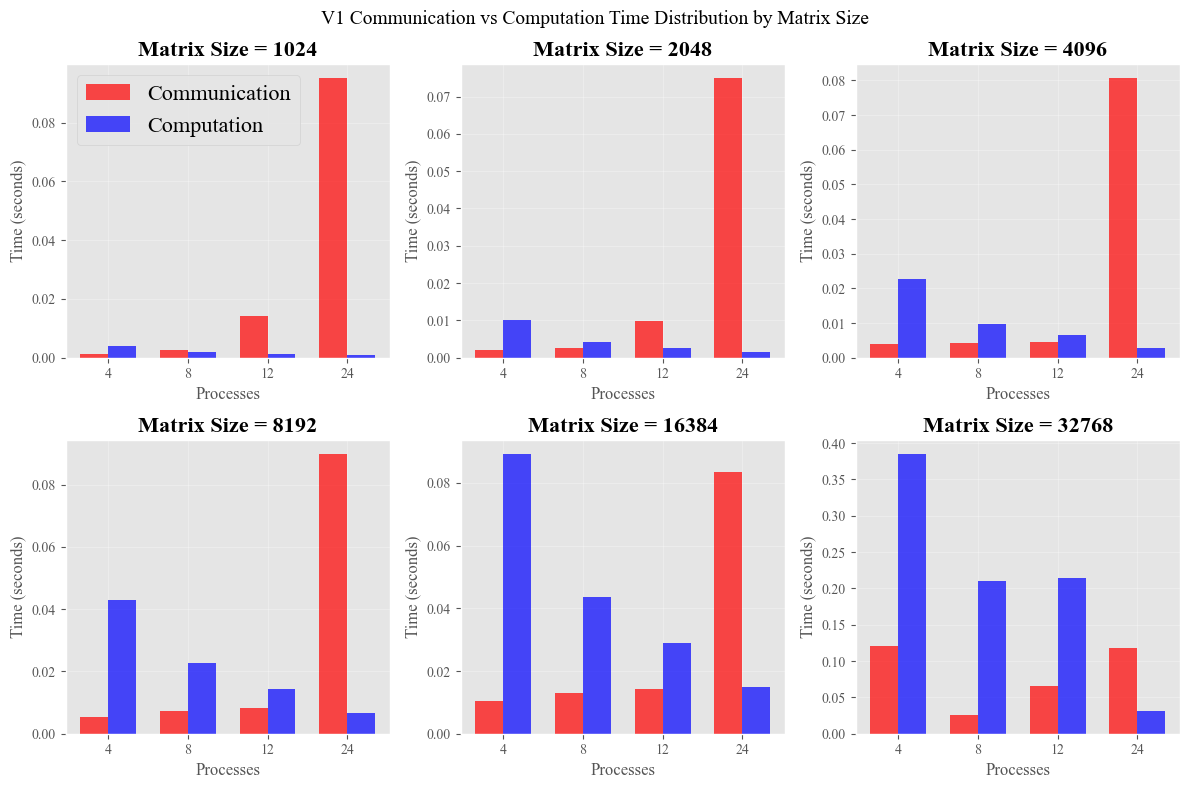

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Complete data from profiling - using absolute times instead of problematic percentages
data = {
    'matrix_size': ['1024', '1024', '1024', '1024',
                    '2048', '2048', '2048', '2048',
                    '4096', '4096', '4096', '4096',
                    '8192', '8192', '8192', '8192',
                    '16384', '16384', '16384', '16384',
                    '32768', '32768', '32768', '32768'],
    'processes': [4, 8, 12, 24, 4, 8, 12, 24, 4, 8, 12, 24, 4, 8, 12, 24, 4, 8, 12, 24, 4, 8, 12, 24],
    'total_time': [0.018089, 0.011543, 0.009290, 0.053643,
                   0.037933, 0.019889, 0.019814, 0.036116,
                   0.081311, 0.038353, 0.027283, 0.042919,
                   0.155686, 0.083043, 0.056000, 0.057277,
                   0.318888, 0.167096, 0.111334, 0.086589,
                   1.180831, 0.616140, 0.566002, 0.147379],
    'comm_time': [0.001354, 0.002603, 0.014179, 0.095055,
                  0.001989, 0.002731, 0.009901, 0.074897,
                  0.004101, 0.004106, 0.004627, 0.080591,
                  0.005403, 0.007388, 0.008361, 0.089693,
                  0.010471, 0.012846, 0.014300, 0.083487,
                  0.120098, 0.026158, 0.065644, 0.118292],
    'comp_time': [0.004076, 0.002002, 0.001258, 0.000872,
                  0.009988, 0.004135, 0.002609, 0.001478,
                  0.022632, 0.009671, 0.006440, 0.002751,
                  0.042960, 0.022809, 0.014420, 0.006648,
                  0.089135, 0.043575, 0.029017, 0.014869,
                  0.384594, 0.210408, 0.214857, 0.031252]
}

# Create visualization for different matrix sizes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('V1 Communication vs Computation Time Distribution by Matrix Size', fontsize=14)

matrix_sizes = ['1024', '2048', '4096', '8192', '16384', '32768']
colors_comm = ['red', 'orange', 'brown', 'pink', 'purple', 'crimson']
colors_comp = ['blue', 'cyan', 'navy', 'lightblue', 'darkblue', 'steelblue']

for idx, size in enumerate(matrix_sizes):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Filter data for current matrix size
    mask = np.array(data['matrix_size']) == size
    processes = np.array(data['processes'])[mask]
    comm_times = np.array(data['comm_time'])[mask]
    comp_times = np.array(data['comp_time'])[mask]
    
    x = np.arange(len(processes))
    width = 0.35
    
    ax.bar(x - width/2, comm_times, width, label='Communication', color='red', alpha=0.7)
    ax.bar(x + width/2, comp_times, width, label='Computation', color='blue', alpha=0.7)
    ax.set_xlabel('Processes')
    ax.set_ylabel('Time (seconds)')
    ax.set_title(f'Matrix Size = {size}', fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(processes)
    if size == '1024':
        ax.legend(fontsize=16)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

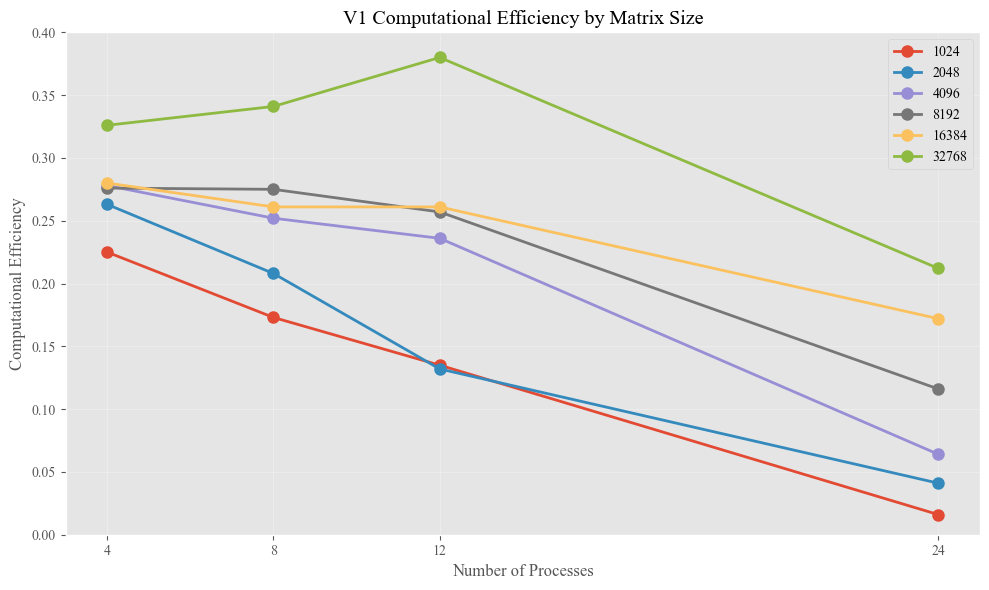

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Complete efficiency data from profiling
efficiency_data = {
    '1024': {'processes': [4, 8, 12, 24], 'efficiency': [0.225, 0.173, 0.135, 0.016]},
    '2048': {'processes': [4, 8, 12, 24], 'efficiency': [0.263, 0.208, 0.132, 0.041]},
    '4096': {'processes': [4, 8, 12, 24], 'efficiency': [0.278, 0.252, 0.236, 0.064]},
    '8192': {'processes': [4, 8, 12, 24], 'efficiency': [0.276, 0.275, 0.257, 0.116]},
    '16384': {'processes': [4, 8, 12, 24], 'efficiency': [0.280, 0.261, 0.261, 0.172]},
    '32768': {'processes': [4, 8, 12, 24], 'efficiency': [0.326, 0.341, 0.380, 0.212]}
}

fig, ax = plt.subplots(figsize=(10, 6))

# Plot all matrix sizes
for size, data in efficiency_data.items():
    ax.plot(data['processes'], data['efficiency'], 'o-', label=size, linewidth=2, markersize=8)

ax.set_xlabel('Number of Processes')
ax.set_ylabel('Computational Efficiency')
ax.set_title('V1 Computational Efficiency by Matrix Size')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 0.4)

# Set specific x-ticks at measured process counts
ax.set_xticks([4, 8, 12, 24])
ax.set_xlim(3, 25)

plt.tight_layout()
plt.show()

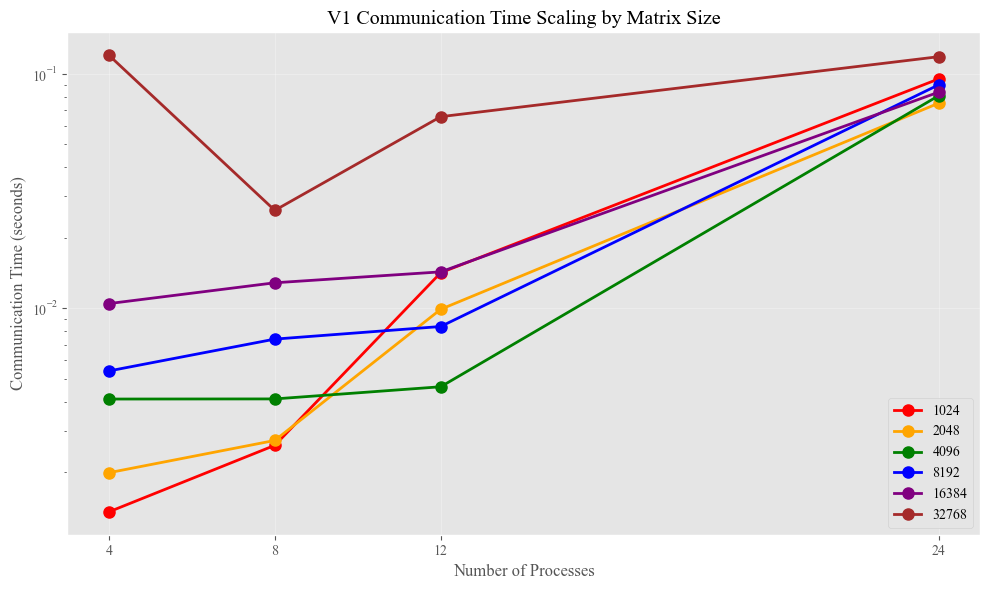

In [44]:
# Complete communication time data
comm_scaling_data = {
    '1024': {'processes': [4, 8, 12, 24], 'comm_time': [0.001354, 0.002603, 0.014179, 0.095055]},
    '2048': {'processes': [4, 8, 12, 24], 'comm_time': [0.001989, 0.002731, 0.009901, 0.074897]},
    '4096': {'processes': [4, 8, 12, 24], 'comm_time': [0.004101, 0.004106, 0.004627, 0.080591]},
    '8192': {'processes': [4, 8, 12, 24], 'comm_time': [0.005403, 0.007388, 0.008361, 0.089693]},
    '16384': {'processes': [4, 8, 12, 24], 'comm_time': [0.010471, 0.012846, 0.014300, 0.083487]},
    '32768': {'processes': [4, 8, 12, 24], 'comm_time': [0.120098, 0.026158, 0.065644, 0.118292]}
}

fig, ax = plt.subplots(figsize=(10, 6))

# Plot absolute communication time for all matrix sizes
colors = ['red', 'orange', 'green', 'blue', 'purple', 'brown']
for idx, (size, data) in enumerate(comm_scaling_data.items()):
    ax.plot(data['processes'], data['comm_time'], 'o-', label=size, 
            linewidth=2, markersize=8, color=colors[idx])

ax.set_xlabel('Number of Processes')
ax.set_ylabel('Communication Time (seconds)')
ax.set_title('V1 Communication Time Scaling by Matrix Size')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)

# Set specific x-ticks at measured process counts
ax.set_xticks([4, 8, 12, 24])
ax.set_xlim(3, 25)

plt.tight_layout()
plt.show()